@author: Valentin Larrieu

Method comparing - Optimisation

In [1]:
%matplotlib notebook
import math                         
import numpy as np      
from sklearn import linear_model   
import random
import string
import time
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from scipy.stats import binom
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

Here a binary classifier $\hat{f}_D^l$ which correctly classify with a probability p = 0.7. Let's set the following variable :

$
Z_l = \left\{
   \begin{array}{ll}
       1 & \mbox{if } \ \hat{f}_D^l = Y\\
       0 & \mbox{else.}
   \end{array}
\right. \\
$

therefore we have
 - $P(Z_l = 1) = p $
 - $P(Z_l = 0) = 1-p $

We decide to make vote L classifier following the same probability. Therefore we can say that $W = \Sigma_{l=0}^{L} Z_l $ followed a binomial rule. The probability that our vote classifies correctly is :

- For L odd : $P(W>\lceil L/2 \rceil) = \Sigma_{k = \lceil L/2 \rceil}^L \binom{L}{k} p^k (1-p)^{L-k}$
- For L even : $P(W = L/2)*0.5 + P(W> L/2) = \binom{L}{L/2} p^{L/2} (1-p)^{L/2}*0.5  + \Sigma_{k = L/2 +1}^L \binom{L}{k} p^k (1-p)^{L-k}$

<IPython.core.display.Javascript object>


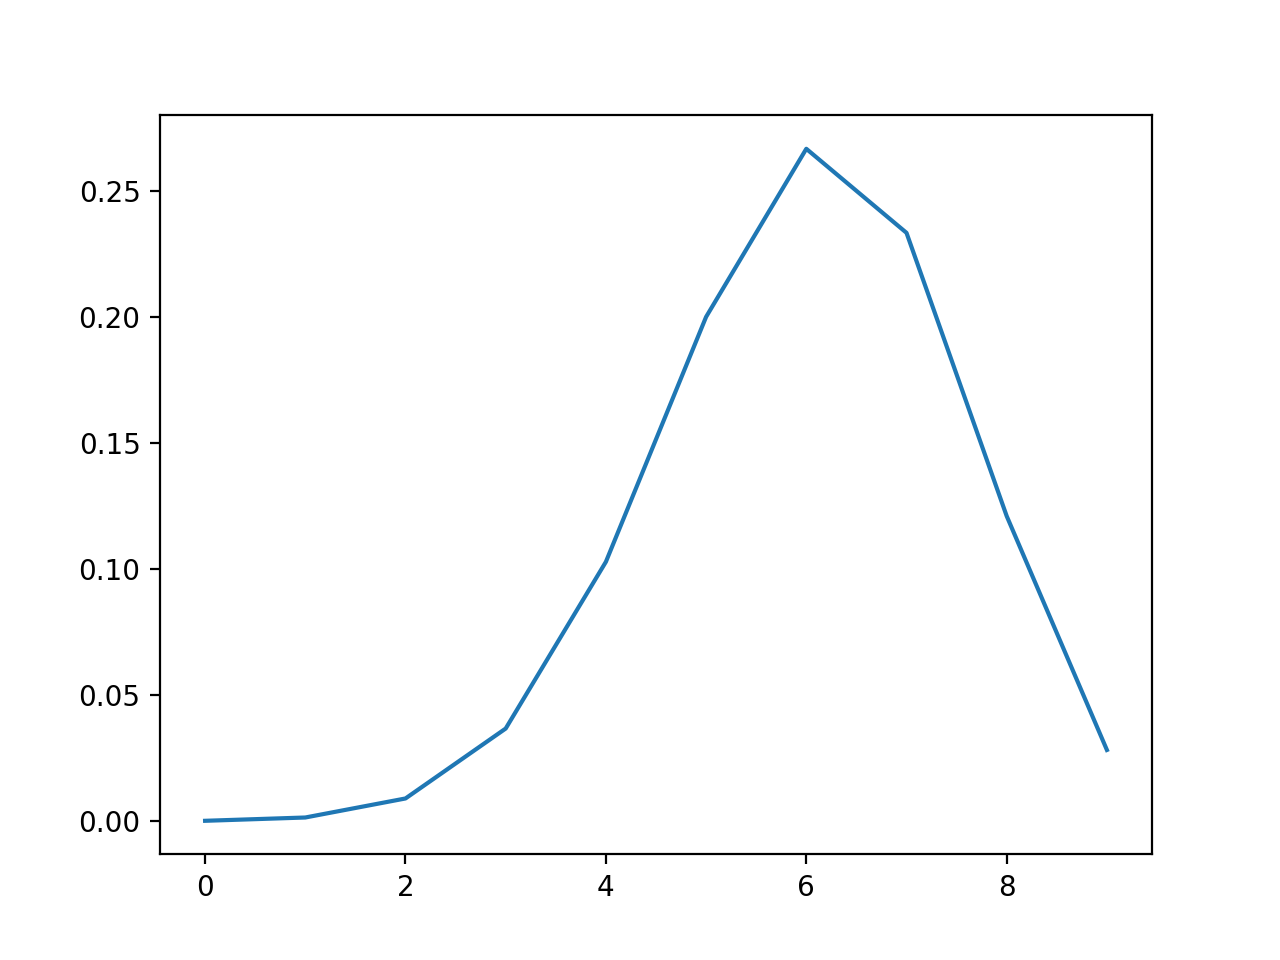

In [16]:
p = 0.7
L_list = [ l for l in range(1,11)]

rv = binom(10, p)

plt.figure()
plt.plot(rv.pmf(L_list))
plt.show()


# Visualisating the importance of the max depth and number of estimators

<IPython.core.display.Javascript object>


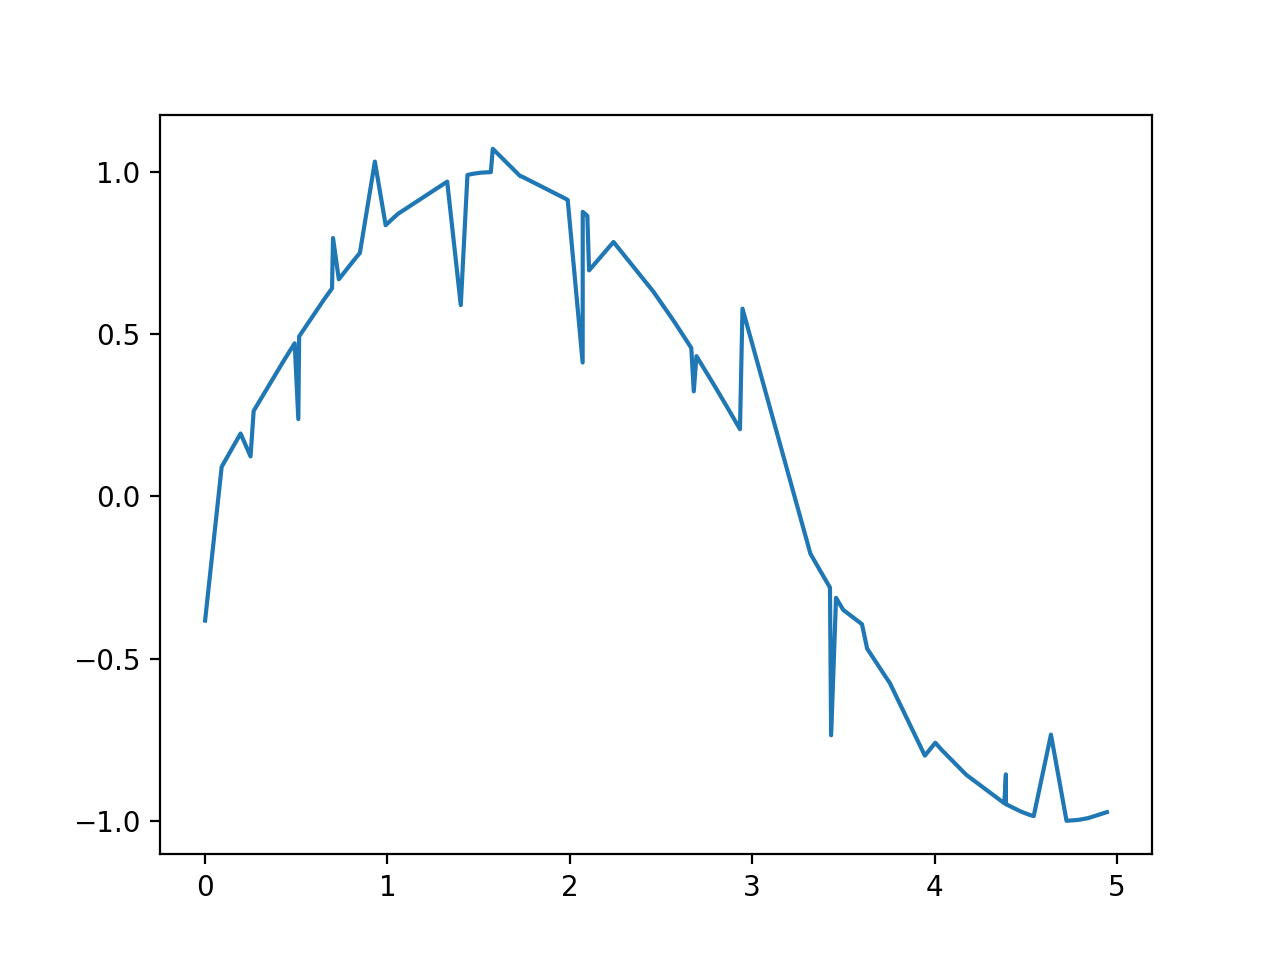

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


plt.figure()
plt.plot(X,y)
plt.show()


## variating the max depth

<IPython.core.display.Javascript object>


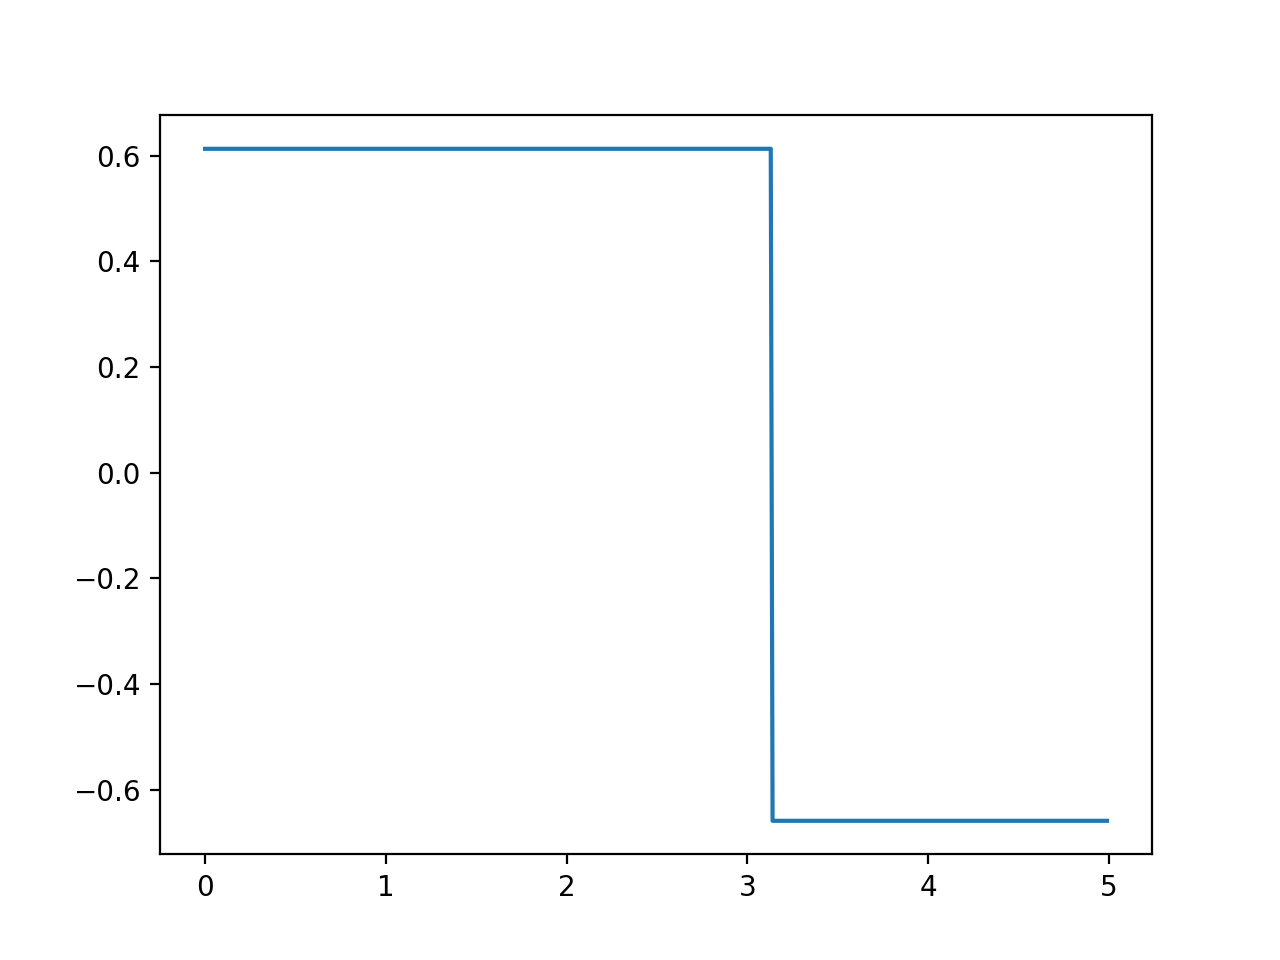

<IPython.core.display.Javascript object>


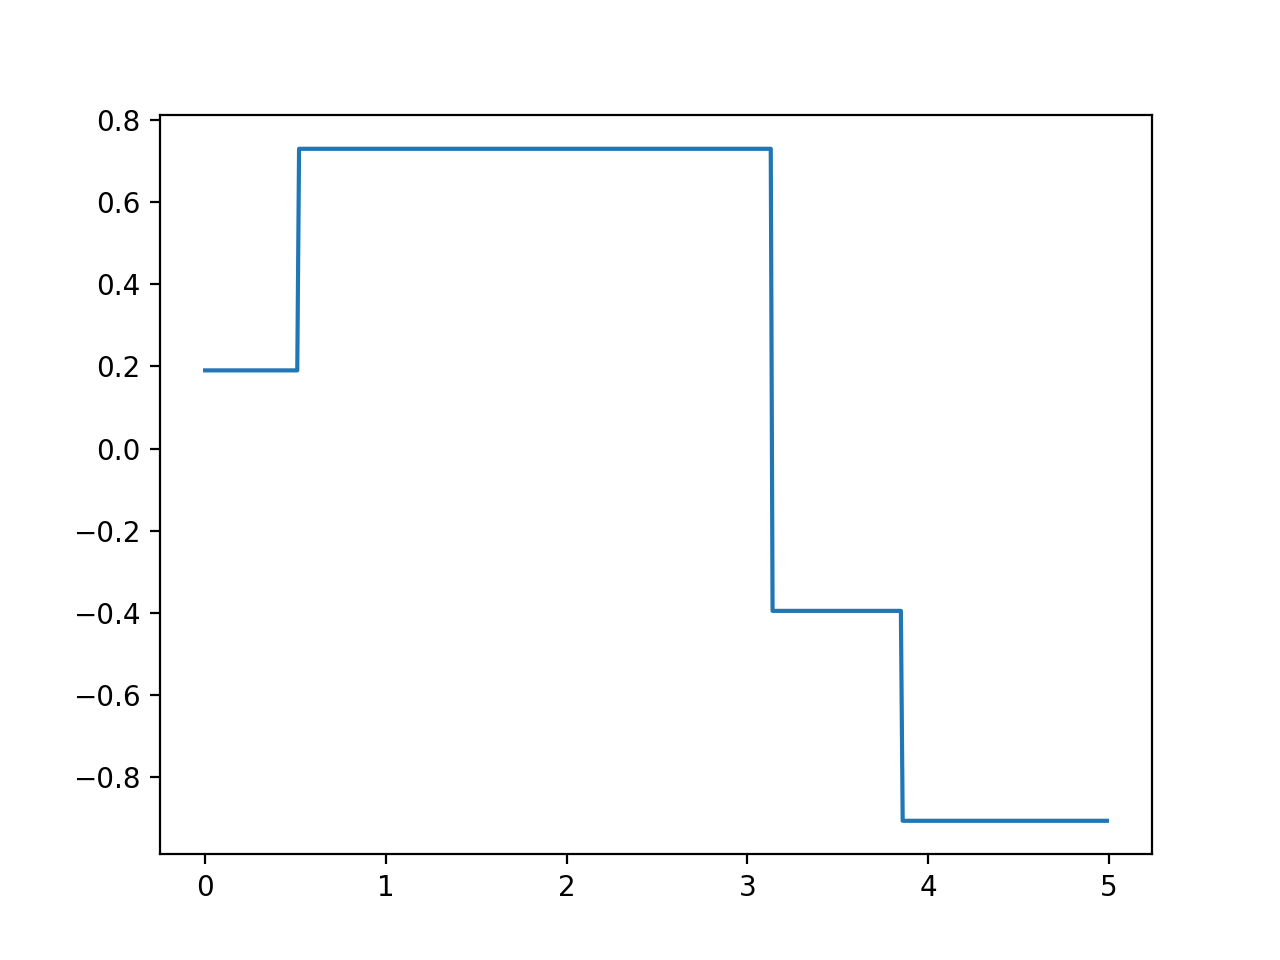

<IPython.core.display.Javascript object>


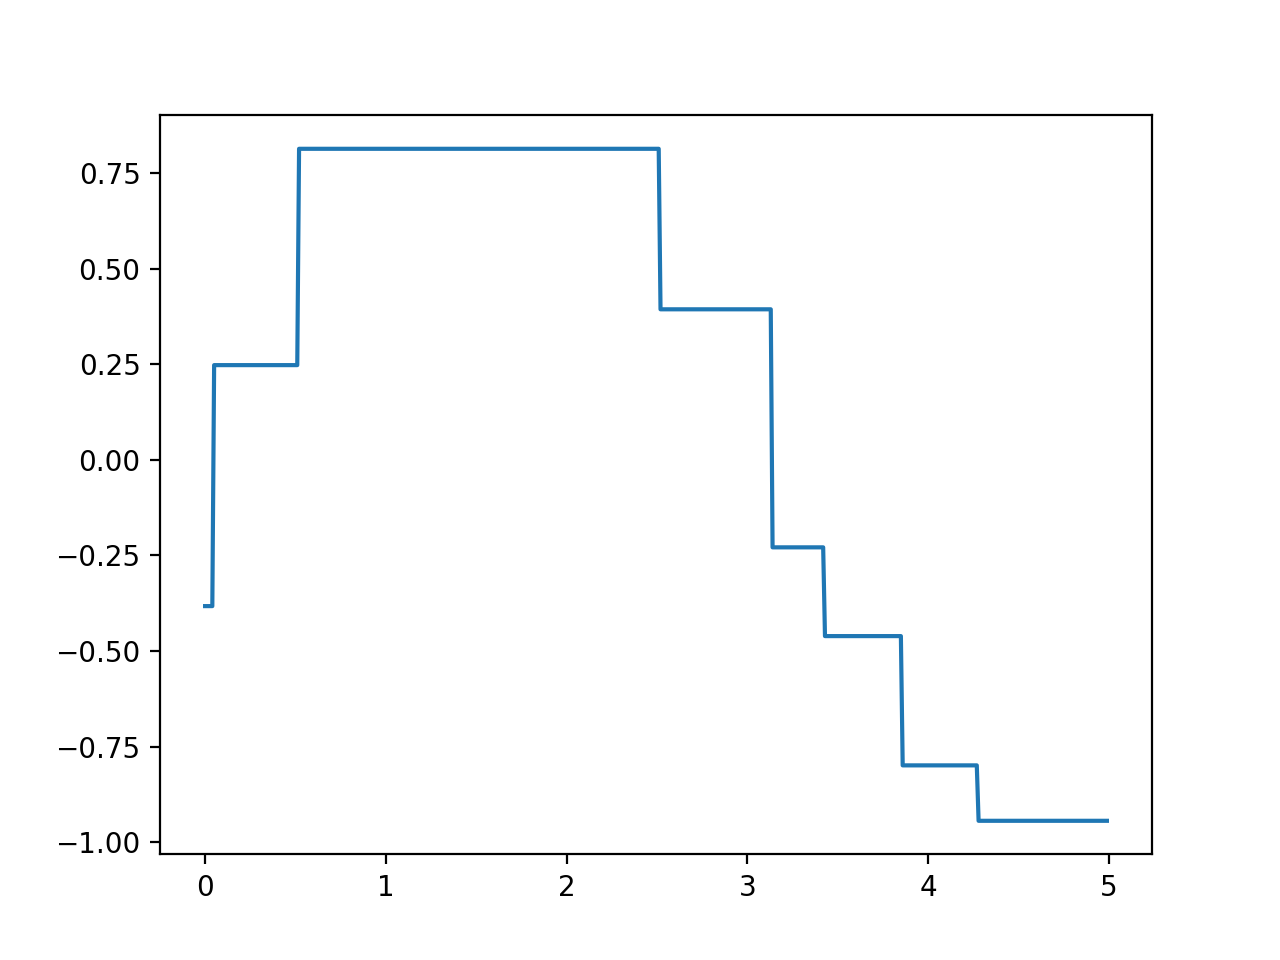

<IPython.core.display.Javascript object>


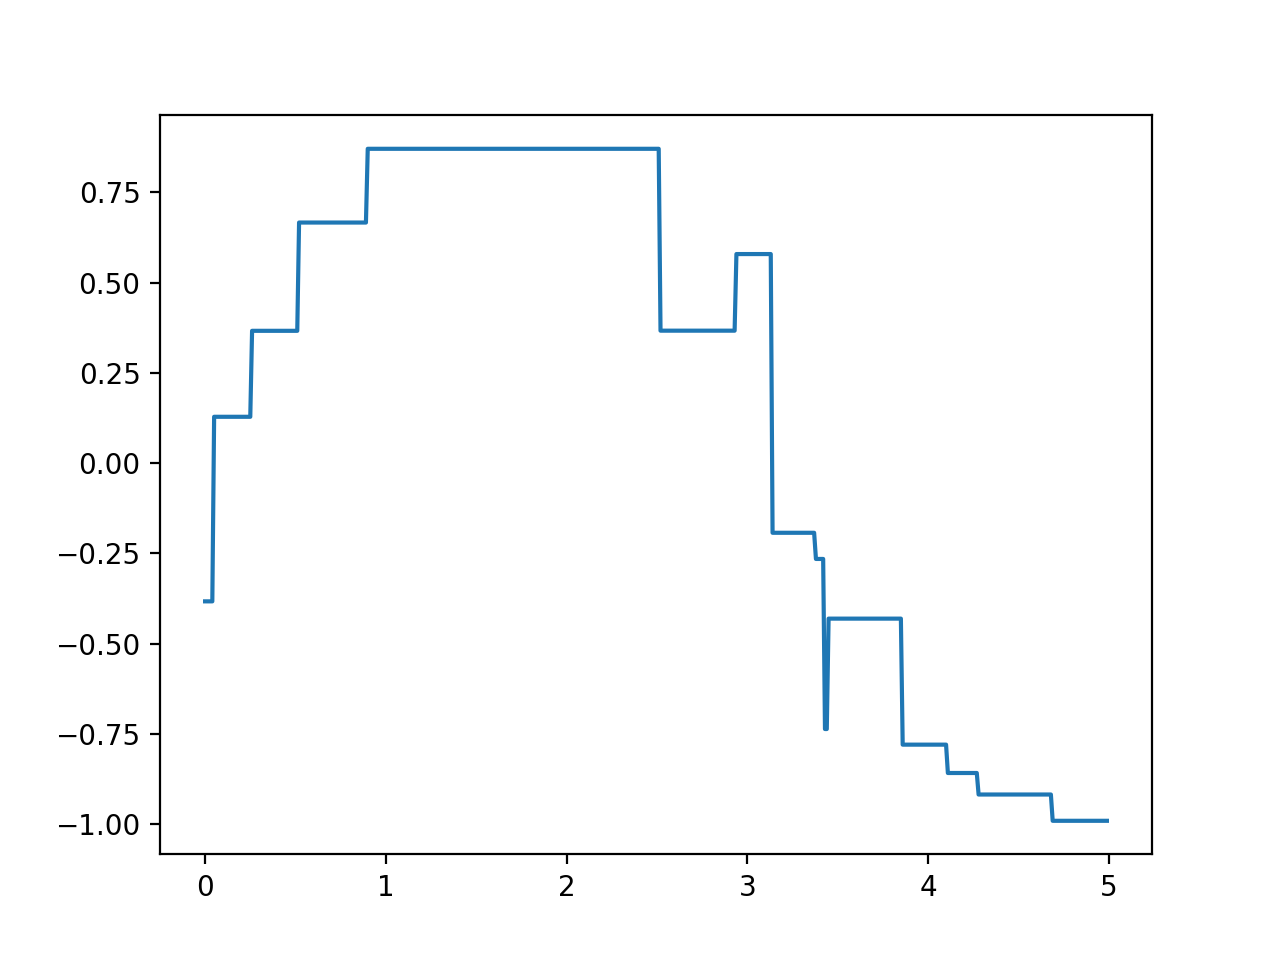

<IPython.core.display.Javascript object>


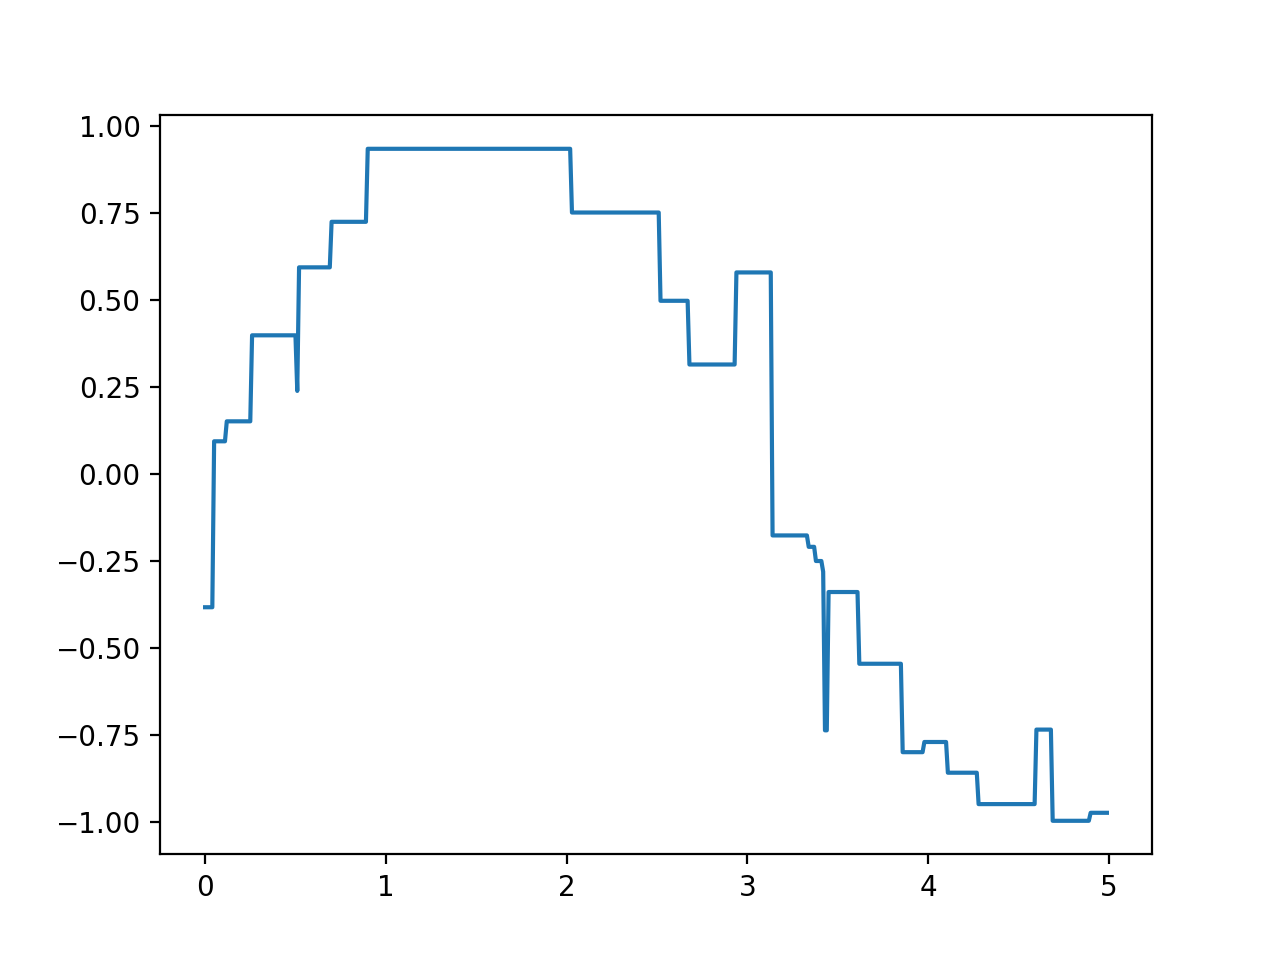

<IPython.core.display.Javascript object>


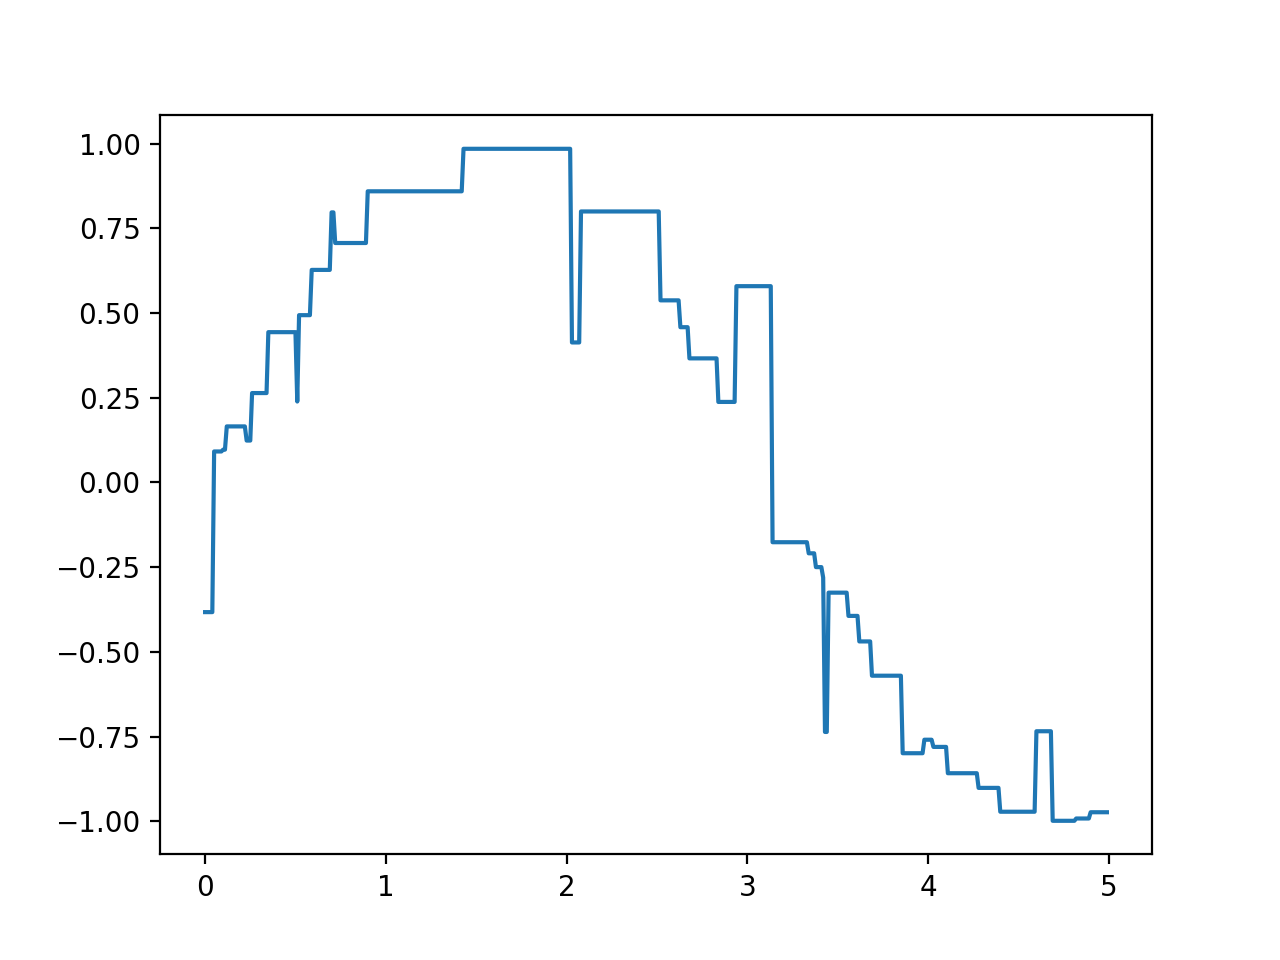

<IPython.core.display.Javascript object>


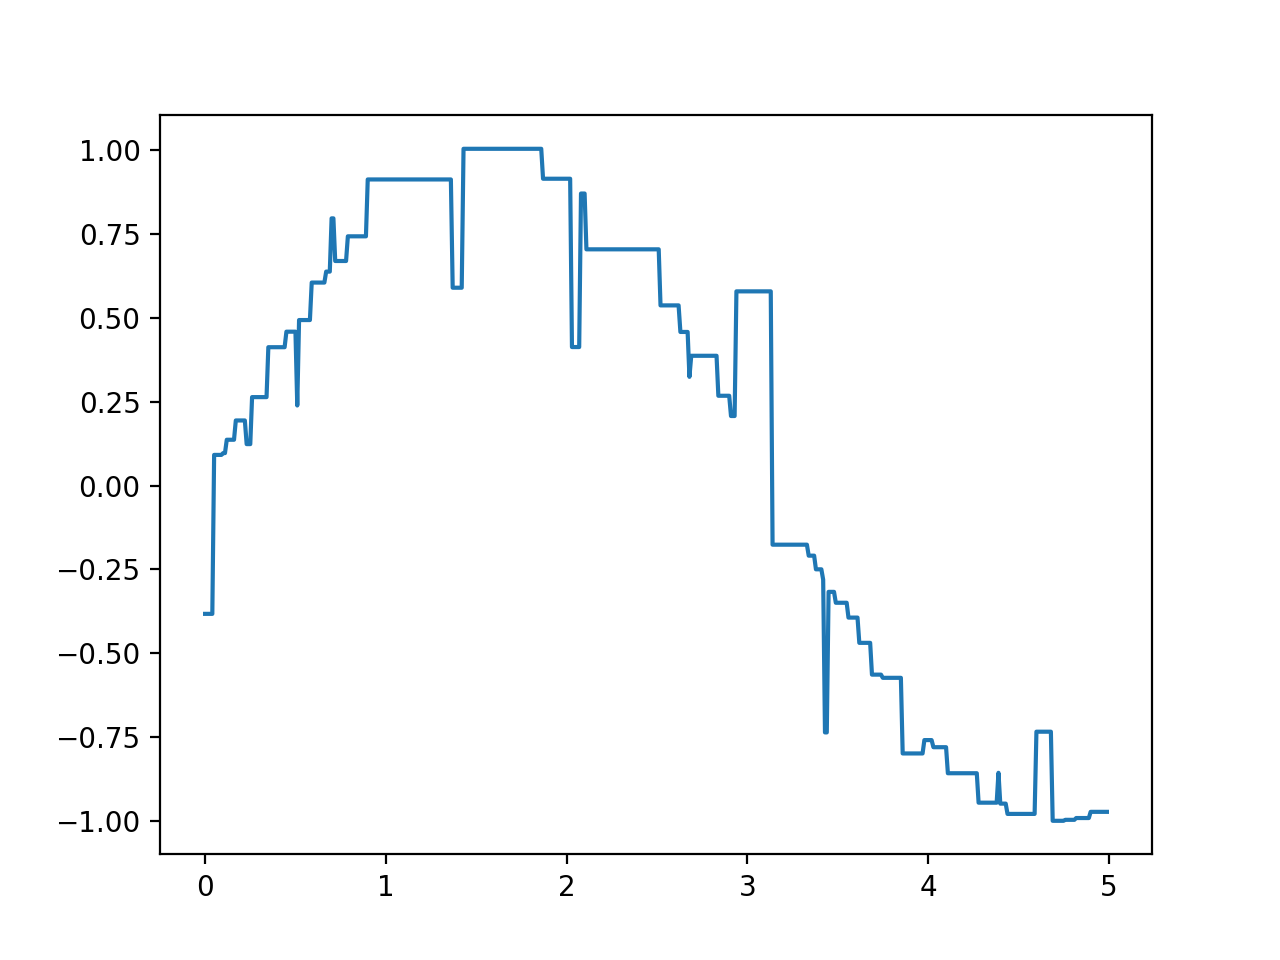

<IPython.core.display.Javascript object>


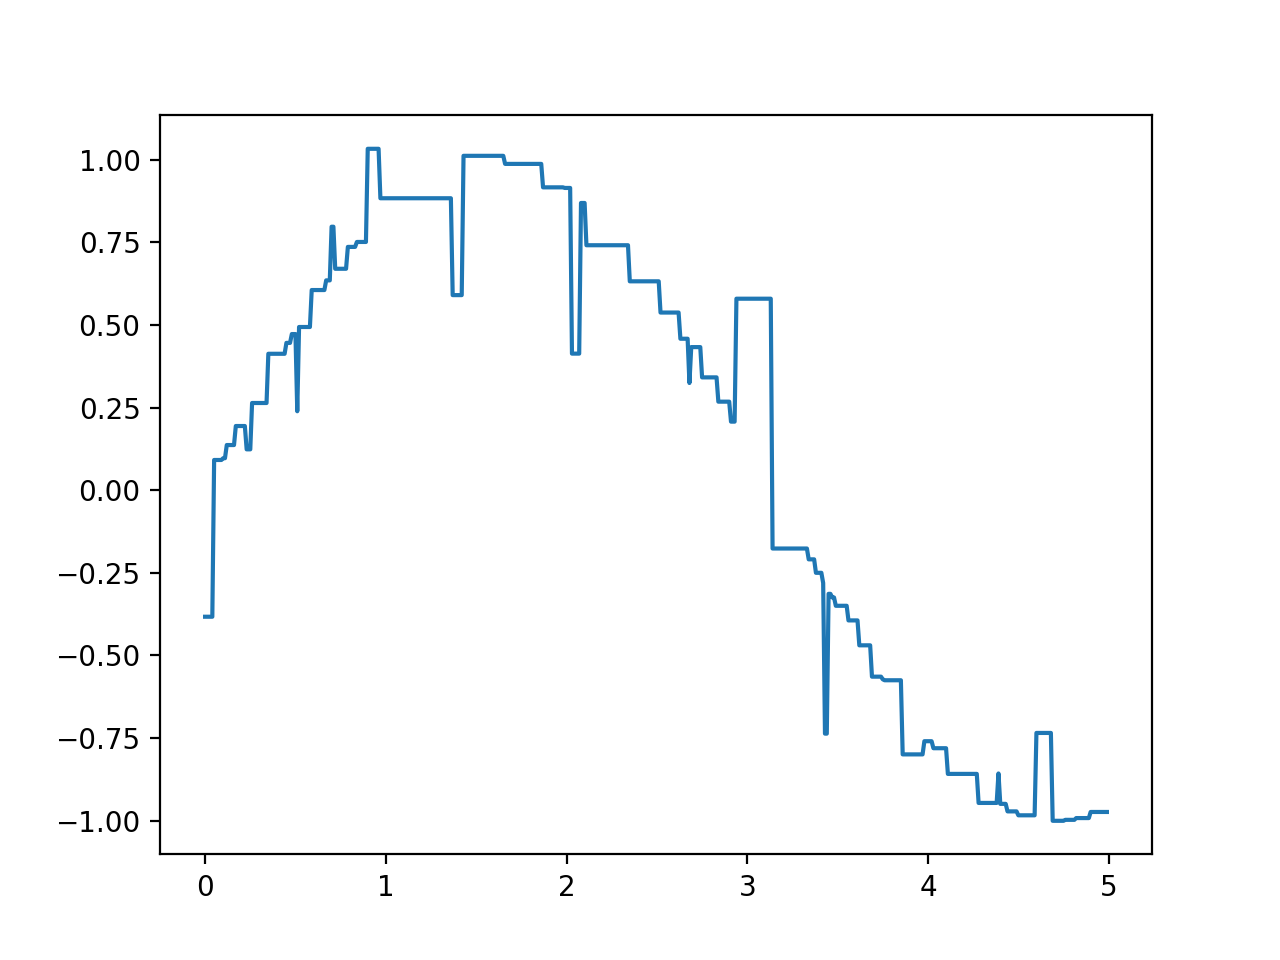

<IPython.core.display.Javascript object>


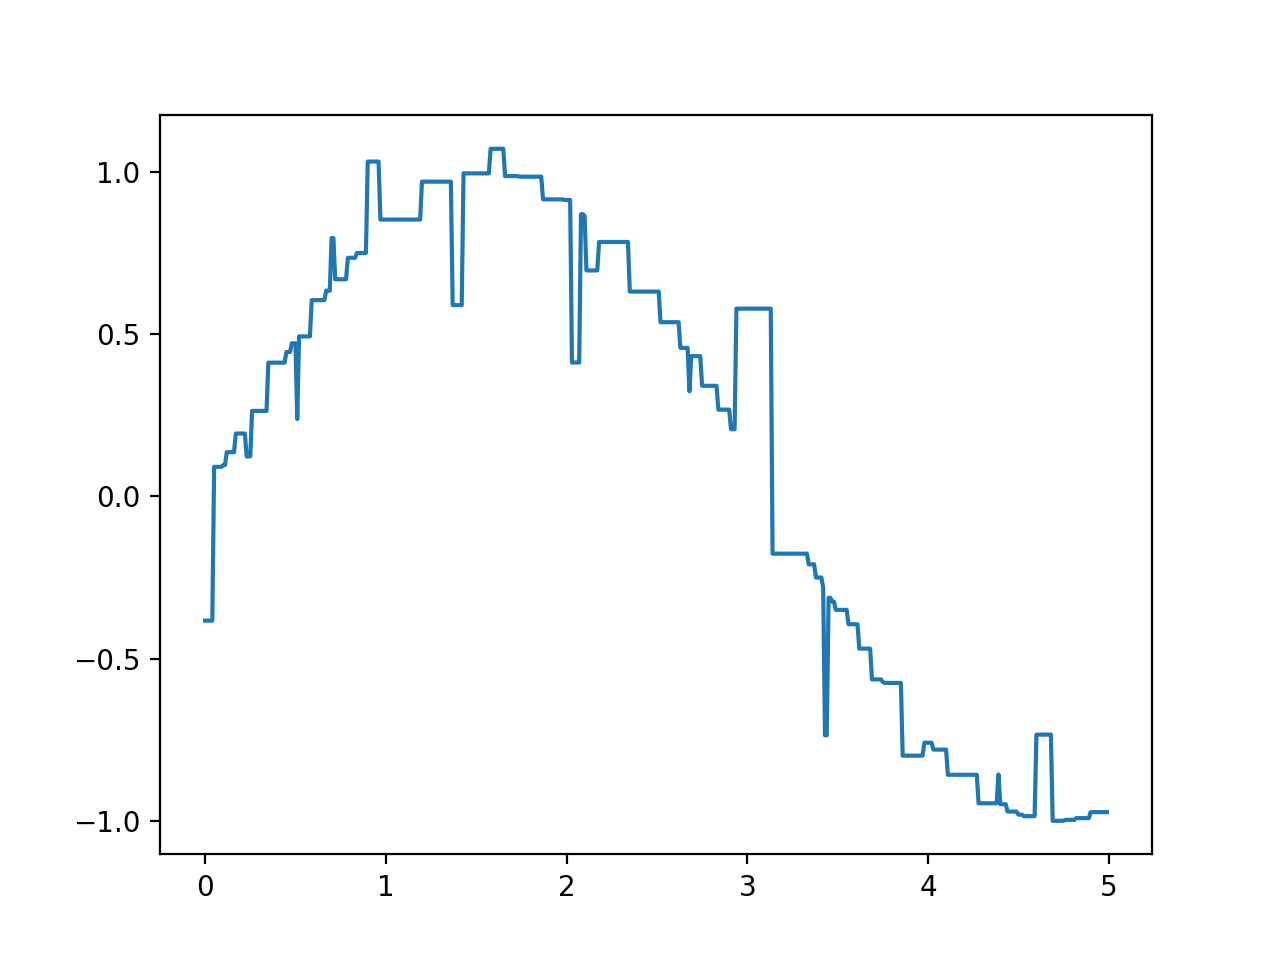

<IPython.core.display.Javascript object>


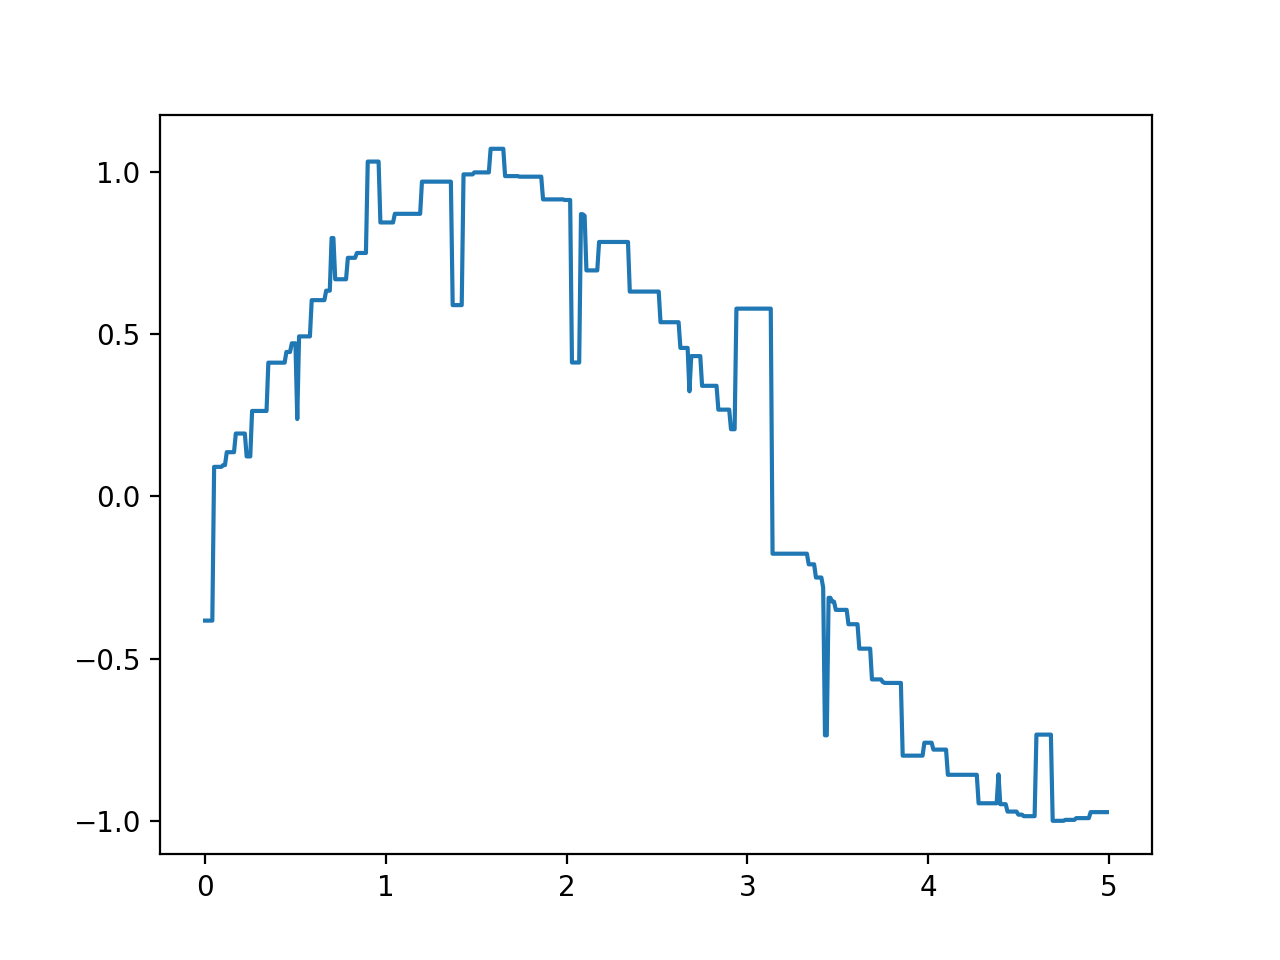

In [18]:

for dep in range (1,11):  
    clf = DecisionTreeRegressor(max_depth=dep)
    clf.fit(X,y)
    y_pred = clf.predict(X_test)
    plt.figure()
    plt.plot(X_test,y_pred)
    plt.show()


## Changing the number of estimator

<IPython.core.display.Javascript object>


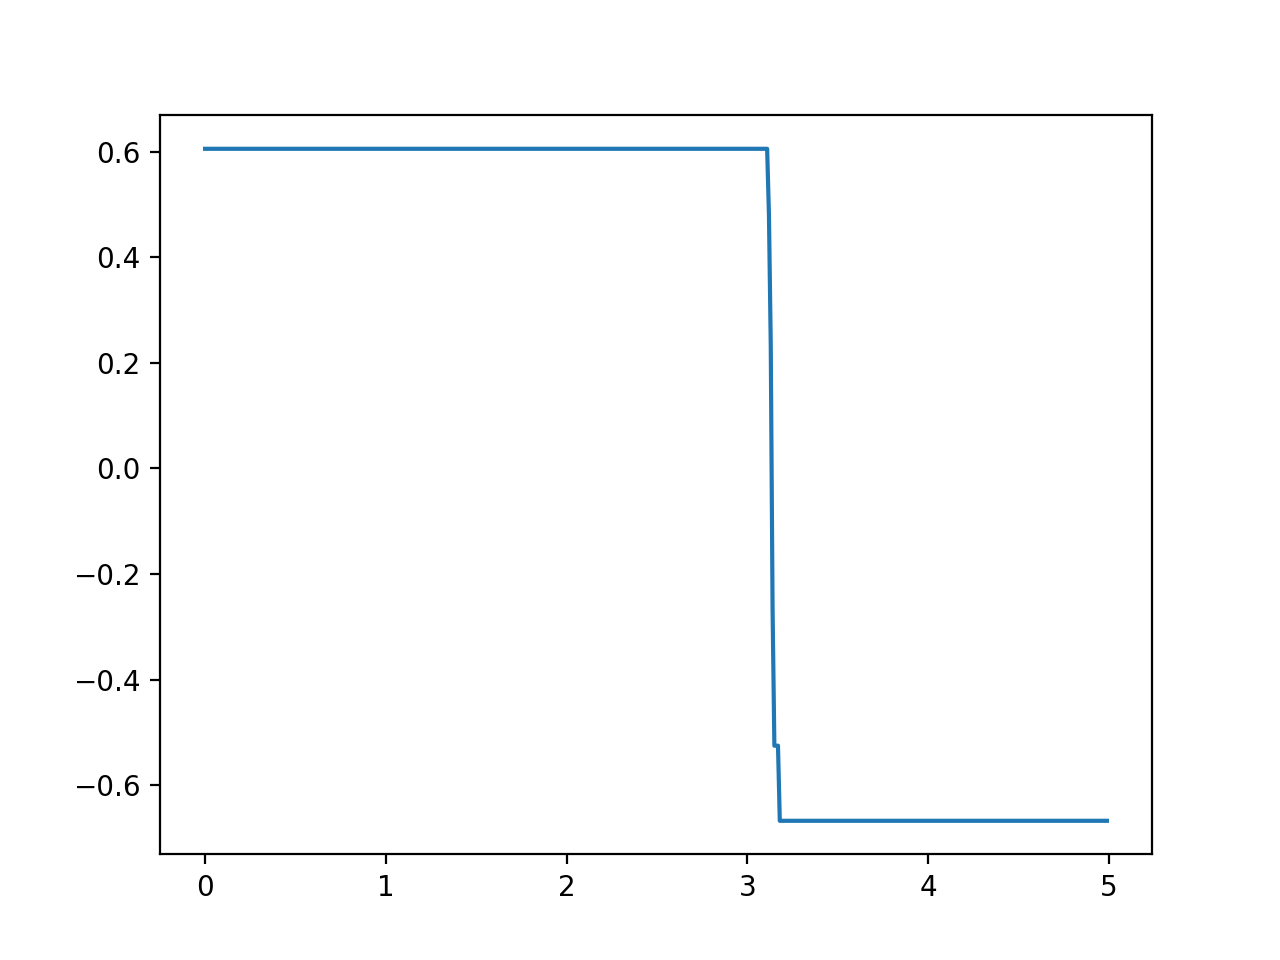

<IPython.core.display.Javascript object>


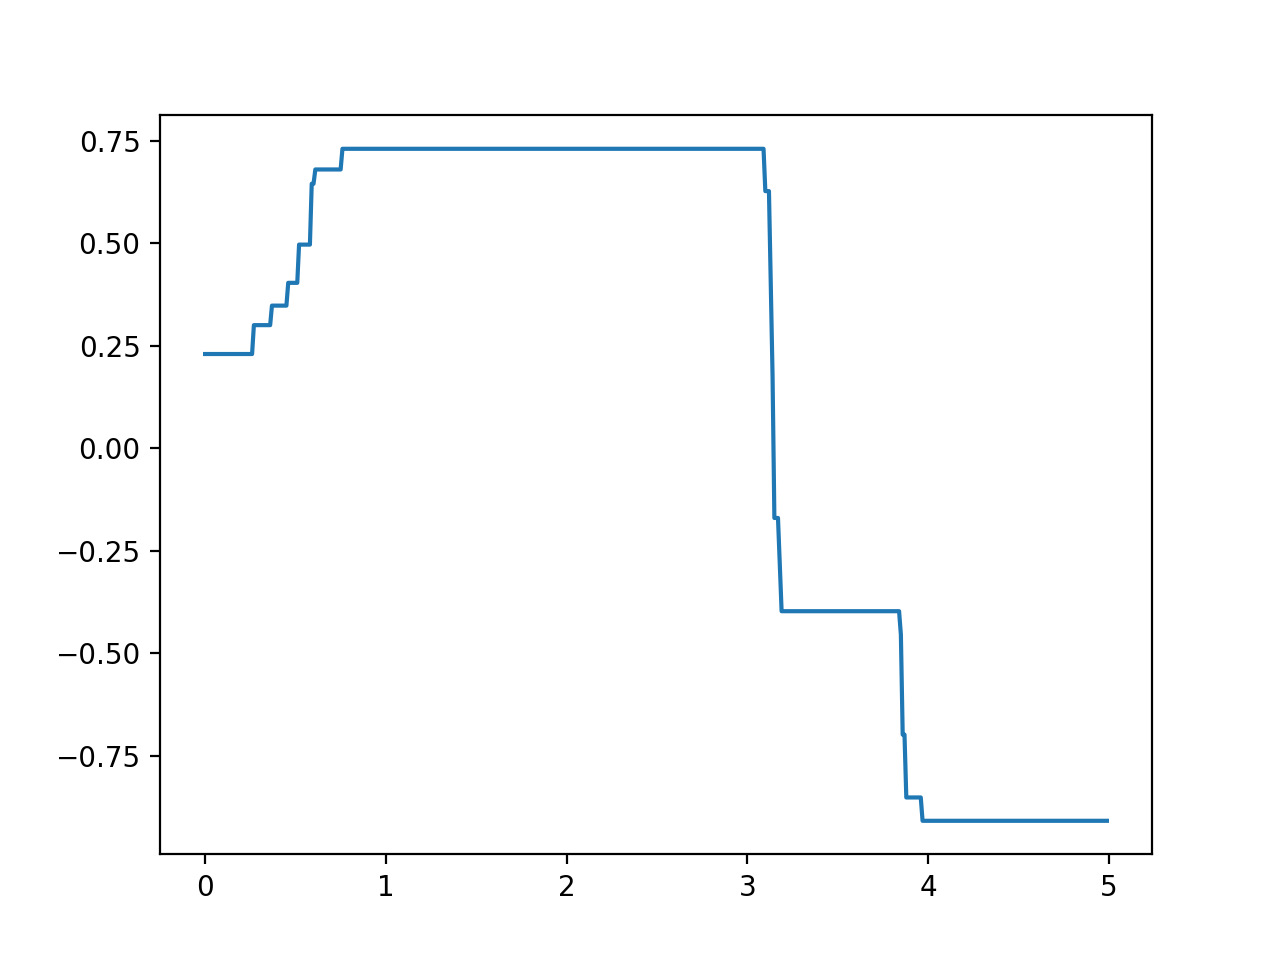

<IPython.core.display.Javascript object>


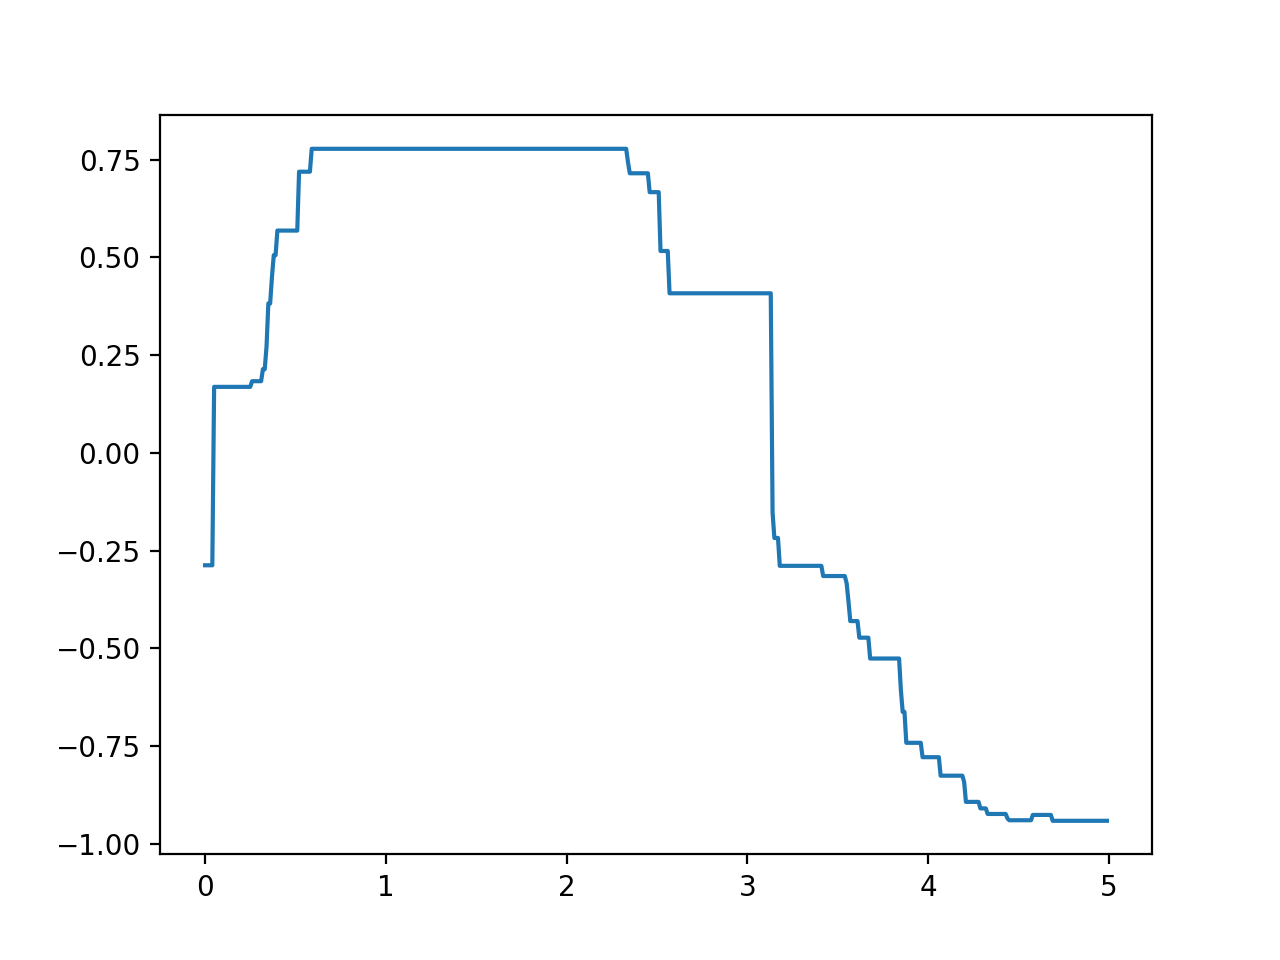

<IPython.core.display.Javascript object>


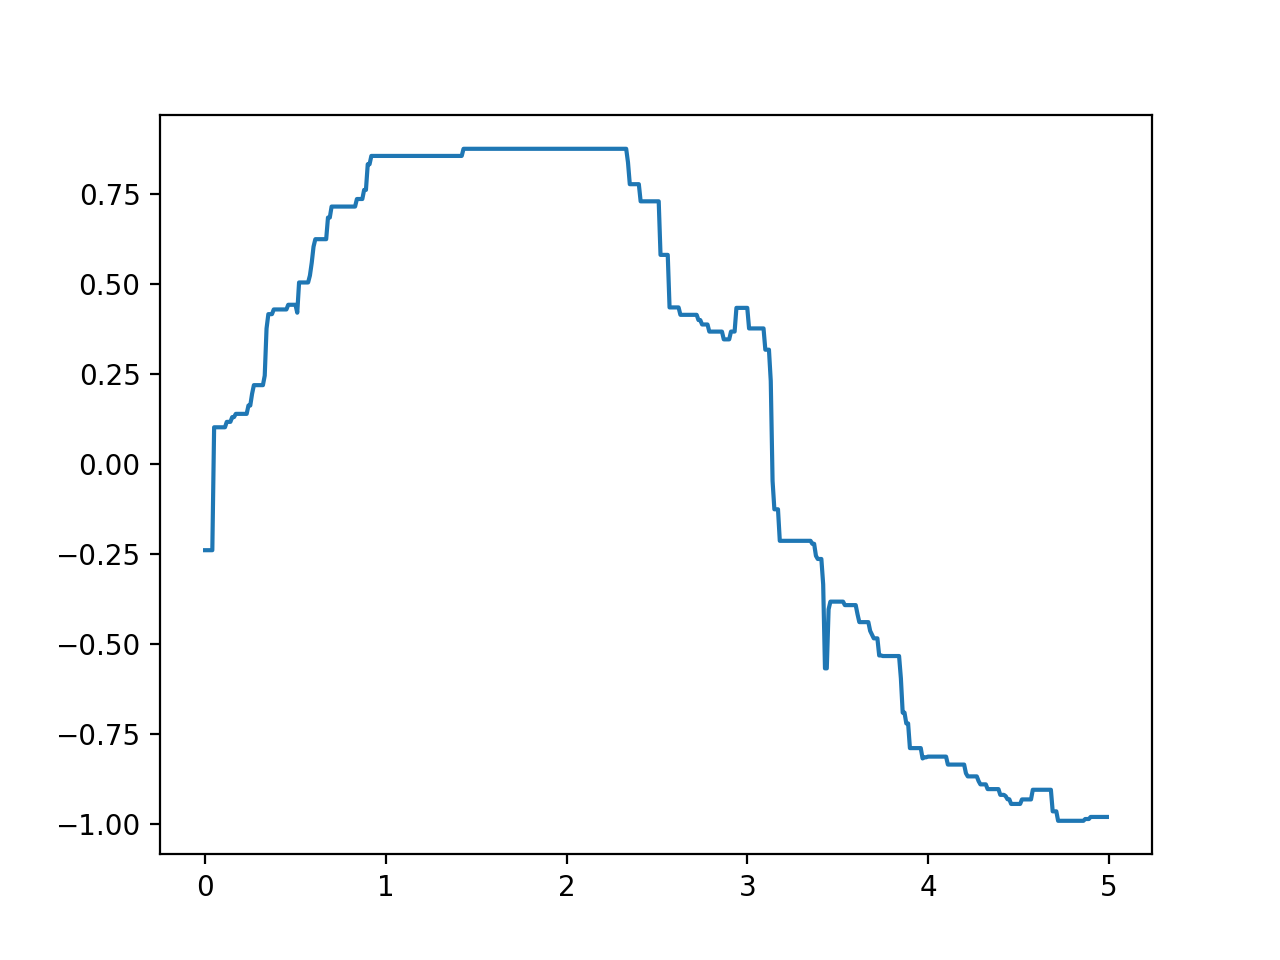

<IPython.core.display.Javascript object>


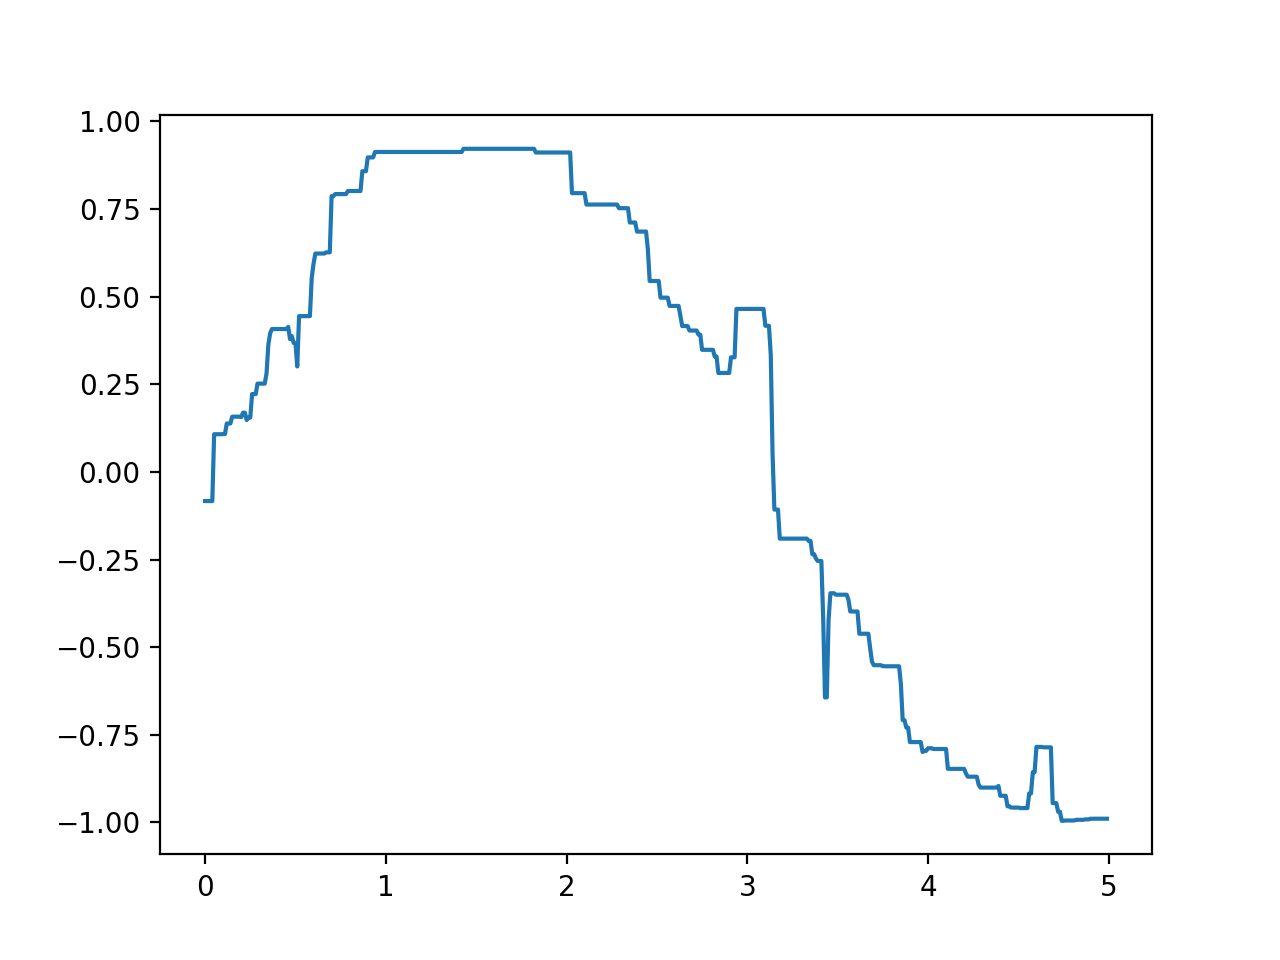

<IPython.core.display.Javascript object>


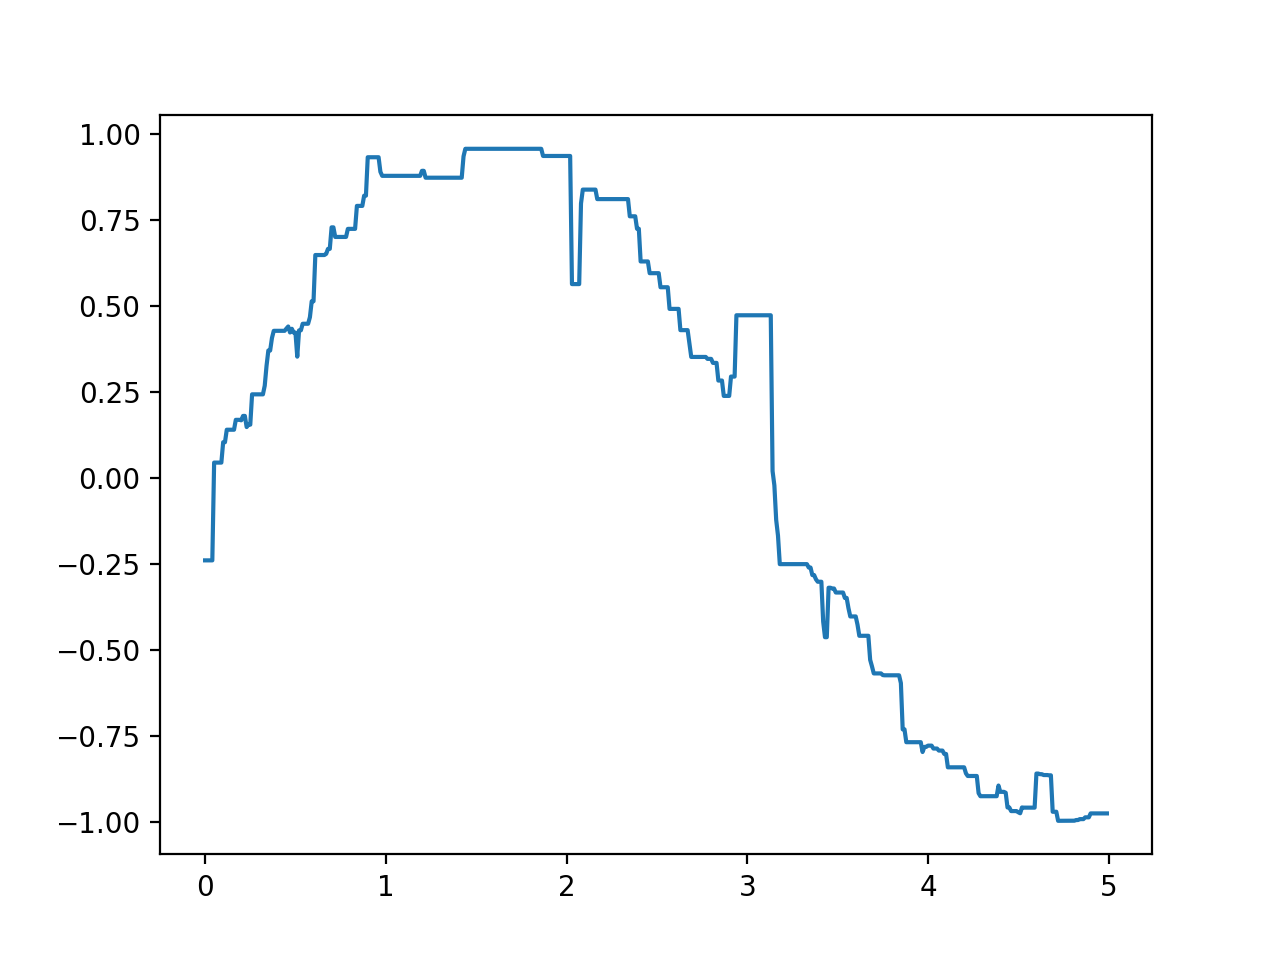

<IPython.core.display.Javascript object>


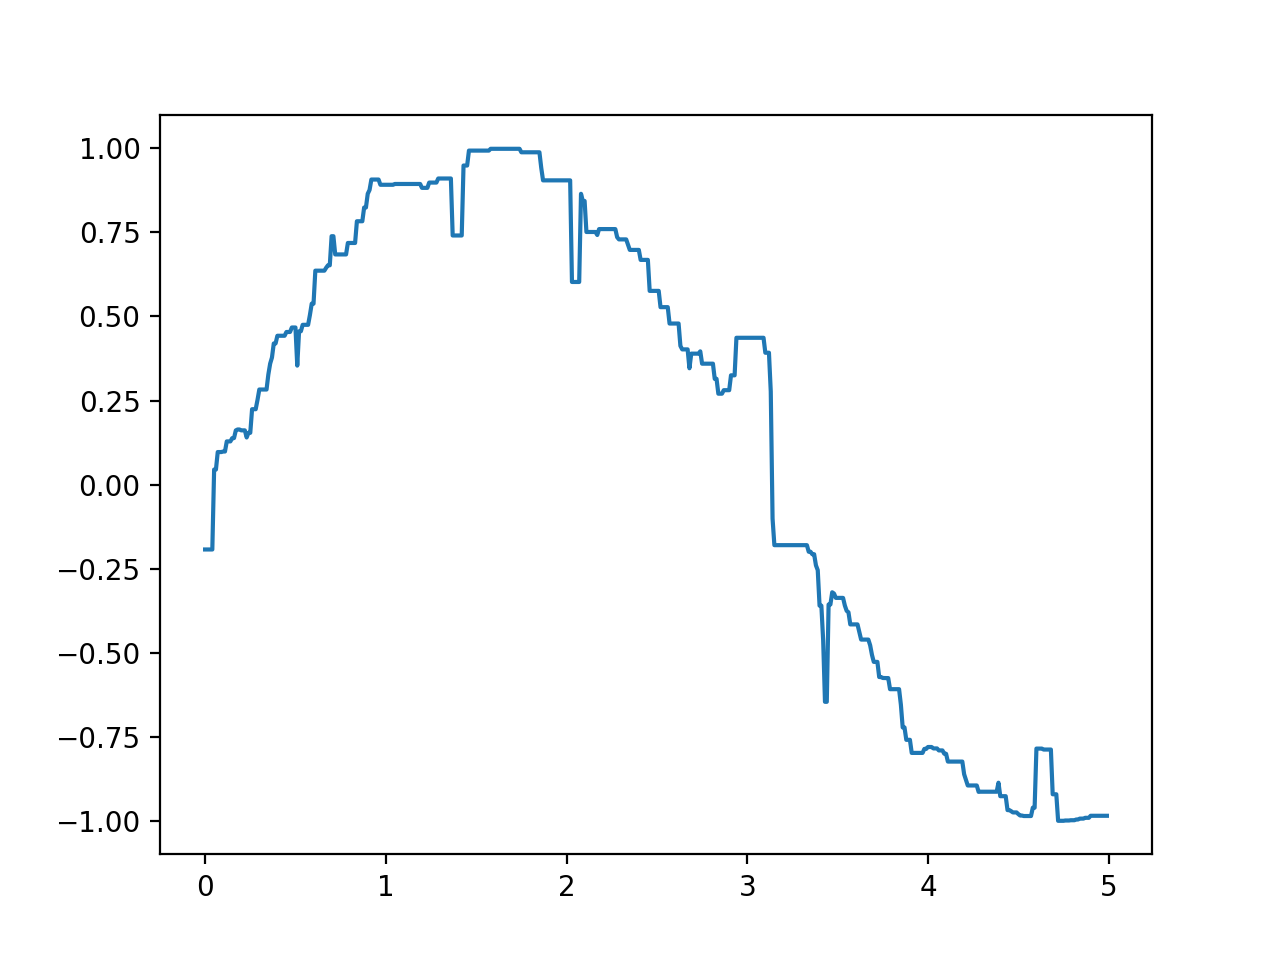

<IPython.core.display.Javascript object>


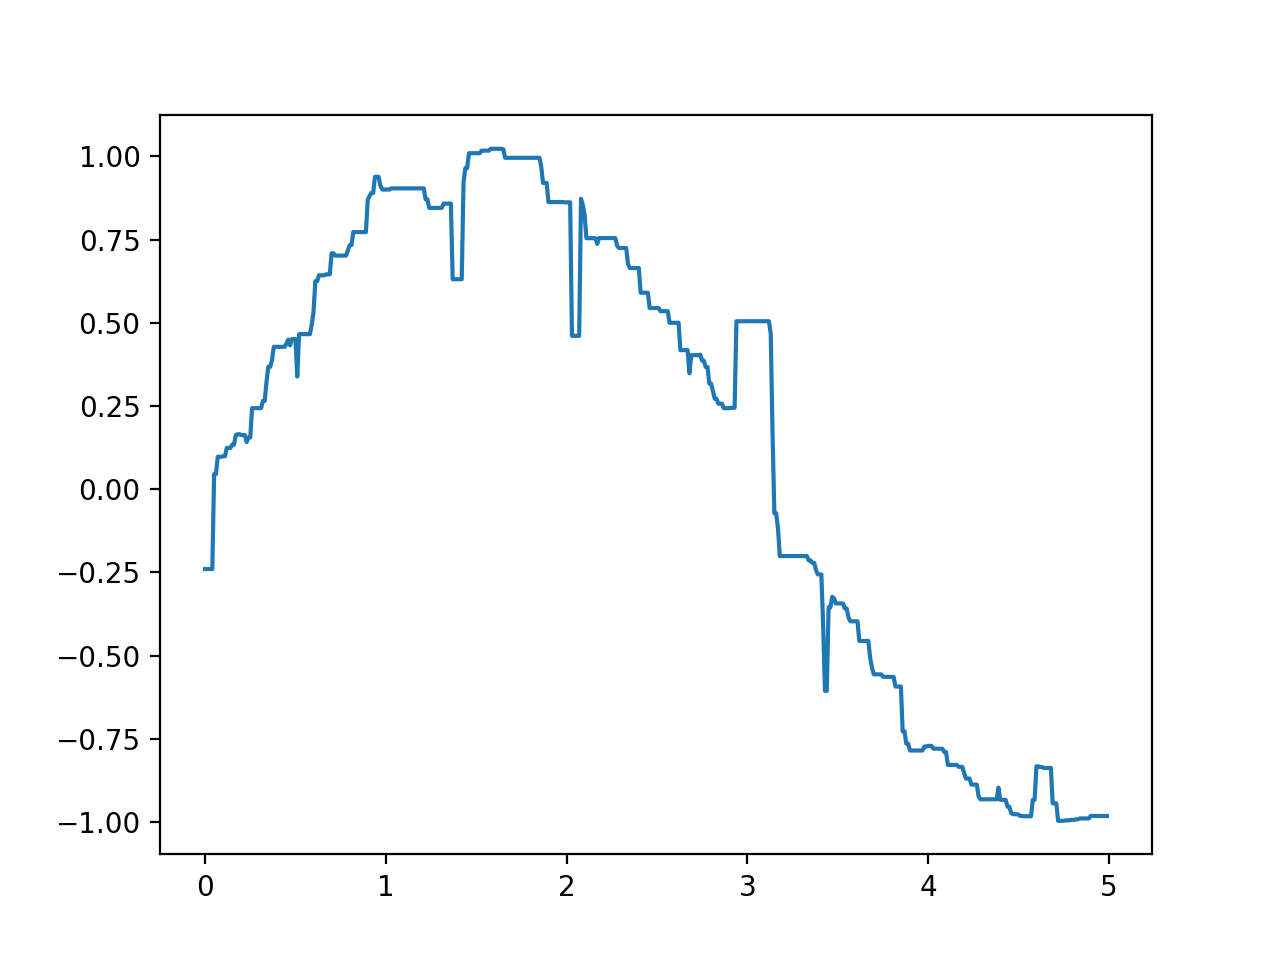

<IPython.core.display.Javascript object>


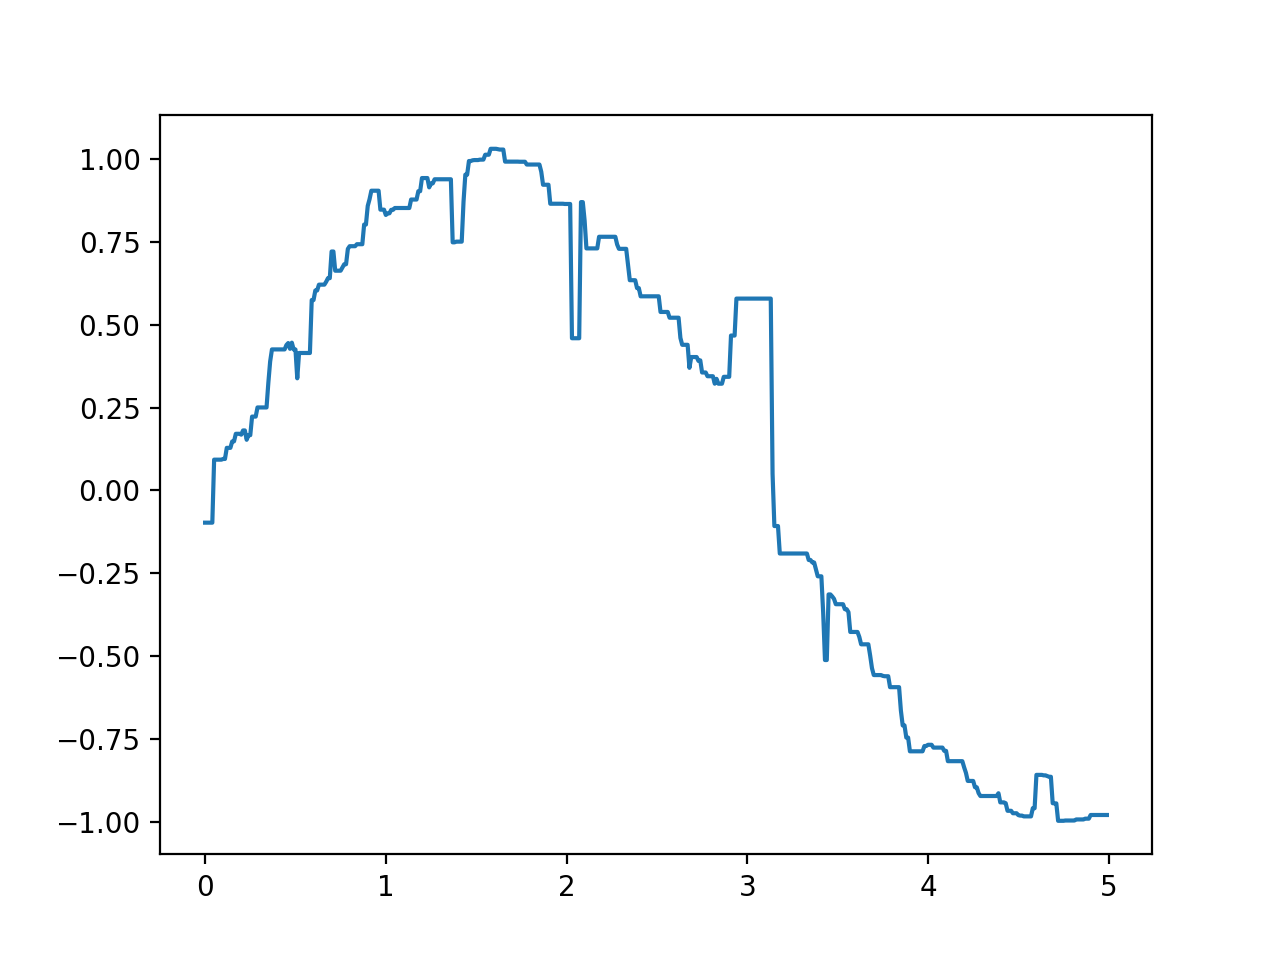

<IPython.core.display.Javascript object>


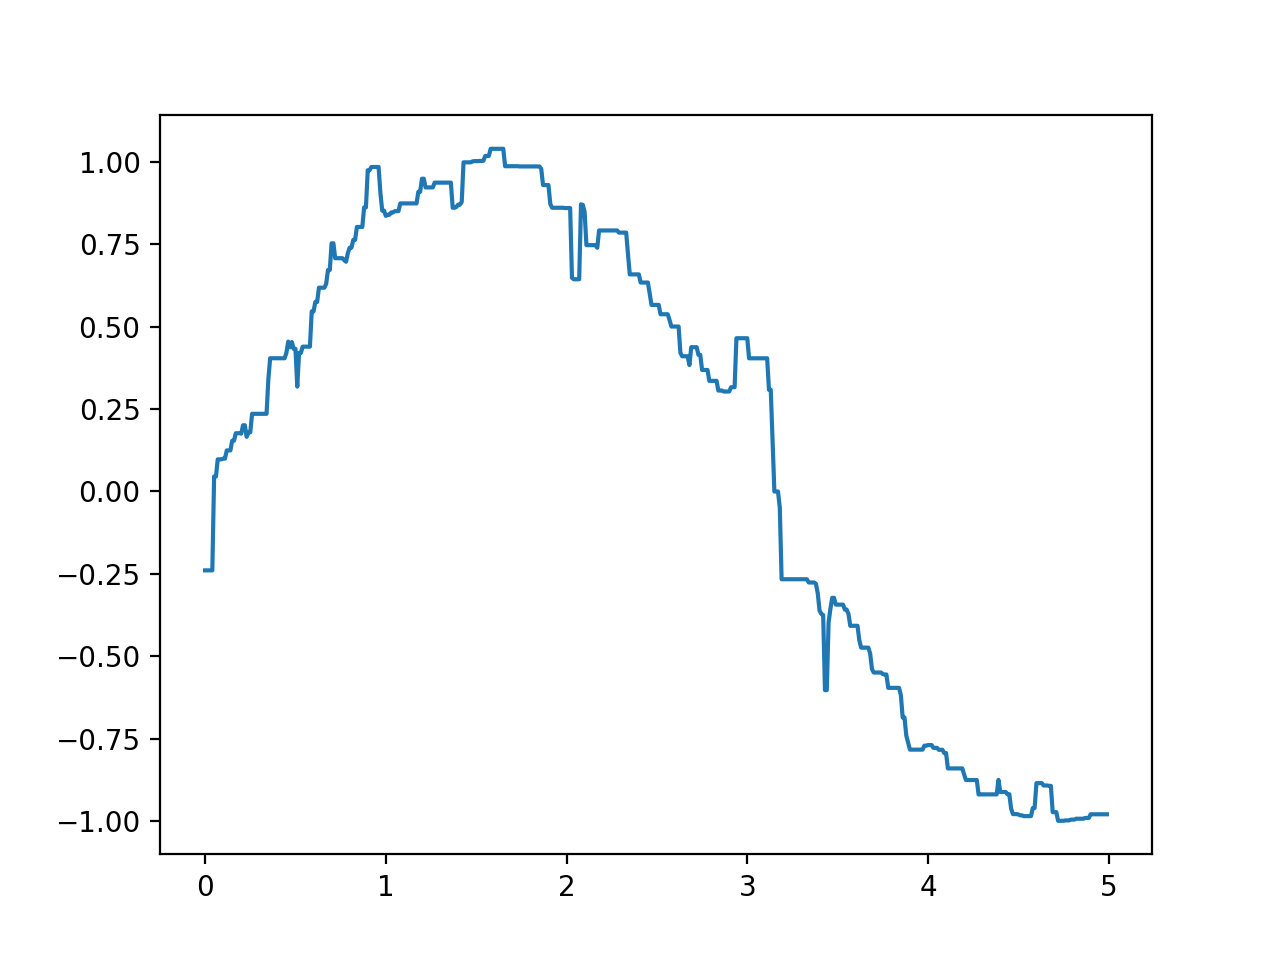

In [19]:

for dep in range (1,11):  
    dt = DecisionTreeRegressor(max_depth=dep)
    clf = BaggingRegressor(dt, n_estimators=10, bootstrap=True)
    clf.fit(X,y)
    y_pred = clf.predict(X_test)
    plt.figure()
    plt.plot(X_test,y_pred)
    plt.show()




# Comparing random forest and decision tree

## Training

We train a random forest and decision tree on 2 datasets

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
iris = load_iris()
digits = load_digits()

clf_rf = RandomForestClassifier()
clf_svm = svm.SVC(kernel='linear', C=1)
score_rf = cross_val_score(clf_rf, iris.data, iris.target, cv=7)
score_svm = cross_val_score(clf_svm, iris.data, iris.target, cv=7)

print("Score RF Iris ", np.mean(score_rf))
print("Score SVM Iris ", np.mean(score_svm))


score_rf2 = cross_val_score(clf_rf, digits.data, digits.target, cv=7)
score_svm2 = cross_val_score(clf_svm, digits.data, digits.target, cv=7)

print("Score RF digits ", np.mean(score_rf2))
print("Score SVM digits ", np.mean(score_svm2))



Score RF Iris  0.9532312925170068
Score SVM Iris  0.9736394557823129
Score RF digits  0.8981593176983846
Score SVM digits  0.9493286226010172


## Cross validating

We compare the score with a cross validation

In [21]:

# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)

clf_rf = RandomForestClassifier()
clf_svm = svm.SVC(kernel='linear', C=1)
score_rf2 = cross_val_score(clf_rf, X, y, cv=7)
score_svm2 = cross_val_score(clf_svm, X, y, cv=7)

print("Score RF digits ", np.mean(score_rf2))
print("Score SVM digits ", np.mean(score_svm2))



Score RF digits  0.7346938775510203
Score SVM digits  0.788265306122449


## Score evolution

We plot the evolution of the score

<IPython.core.display.Javascript object>


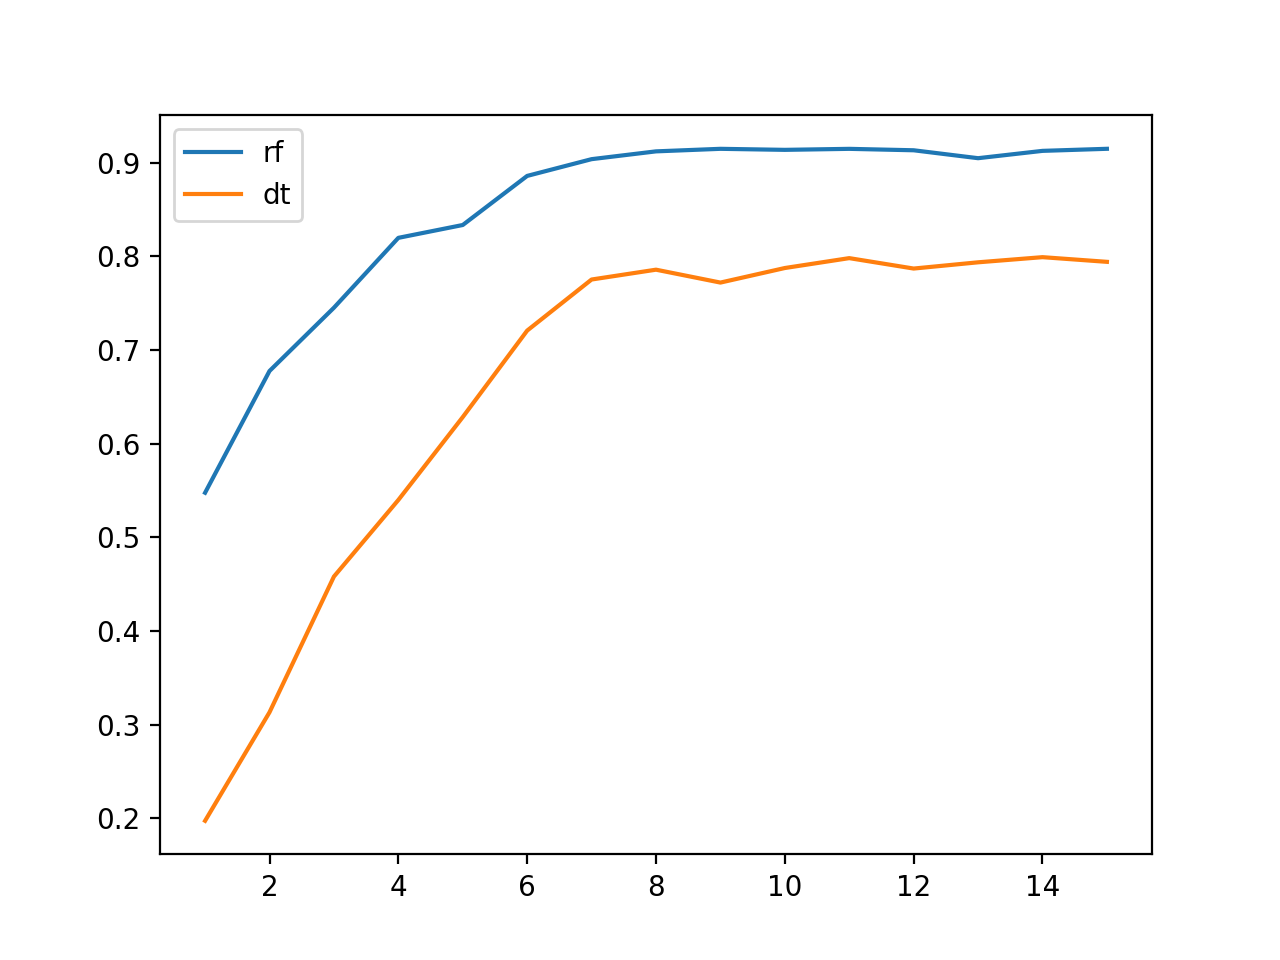

In [29]:
iris = load_iris()
dept_list = [l for l in range (1,16)]
rf_list = []
dt_list = []
for dept in dept_list:
    clf_rf = RandomForestClassifier(max_depth=dept)
    clf_dt = DecisionTreeClassifier(max_depth=dept)
    score_rf = cross_val_score(clf_rf, digits.data, digits.target, cv=6)
    score_dt = cross_val_score(clf_dt, digits.data, digits.target, cv=6)
    rf_list.append(np.mean(score_rf))
    dt_list.append(np.mean(score_dt))

plt.figure()
plt.plot(dept_list,rf_list,label="rf")
plt.plot(dept_list,dt_list,label="dt")
plt.legend()
plt.show()
    
    

## Comparison of the results when max depth fluctuate

This time we make the max depth fluctuate

<IPython.core.display.Javascript object>


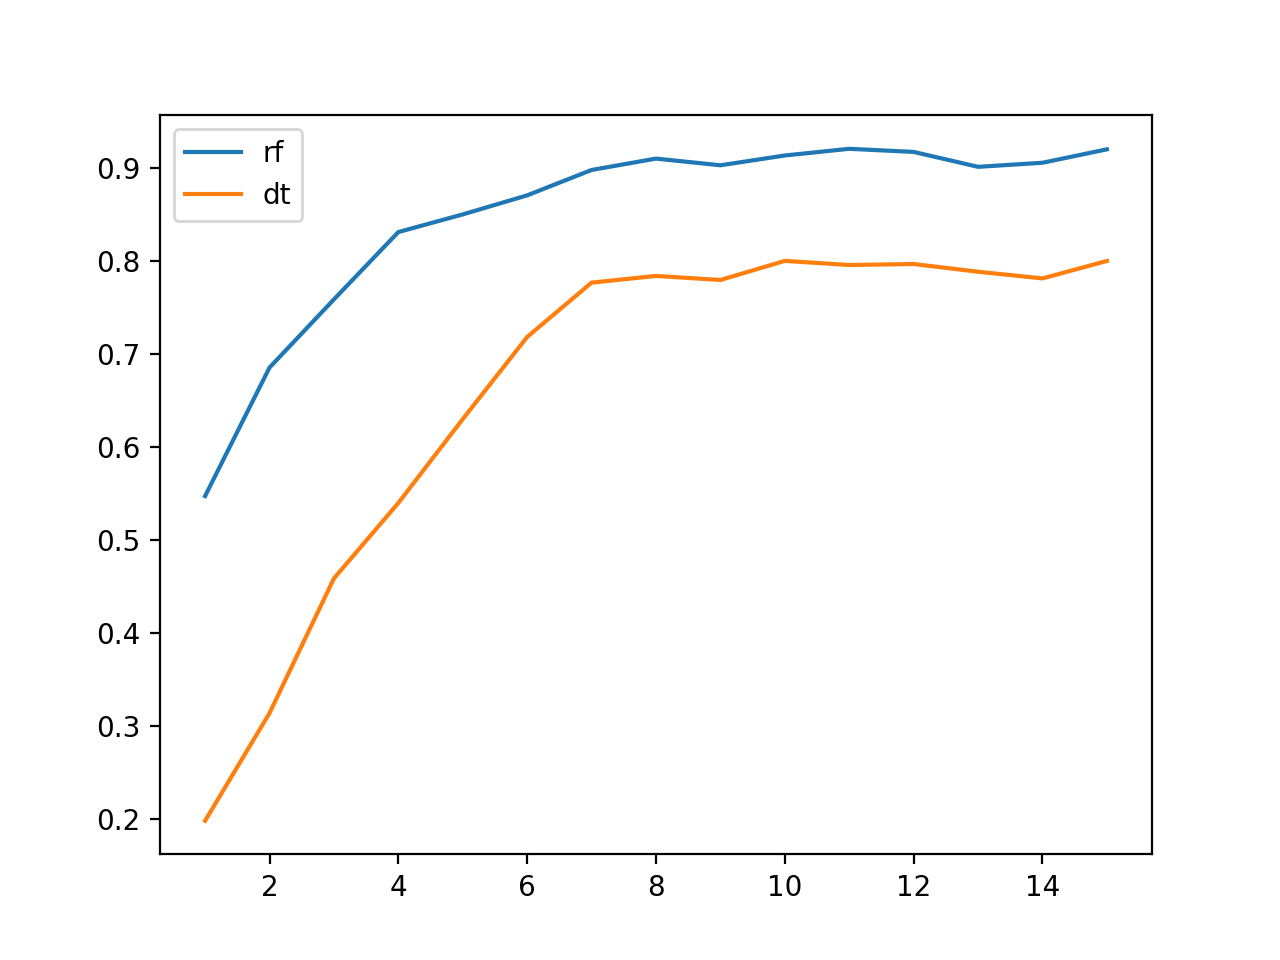

In [30]:
iris = load_iris()
dept_list = [l for l in range (1,16)]
rf_list = []
dt_list = []
for dept in dept_list:
    clf_rf = RandomForestClassifier(max_depth=dept)
    clf_dt = DecisionTreeClassifier(max_depth=dept)
    score_rf = cross_val_score(clf_rf, X, y, cv=6)
    score_dt = cross_val_score(clf_dt, X, y, cv=6)
    rf_list.append(np.mean(score_rf))
    dt_list.append(np.mean(score_dt))

plt.figure()
plt.plot(dept_list,rf_list,label="rf")
plt.plot(dept_list,dt_list,label="dt")
plt.legend()
plt.show()

## Comparison when adaboosted

<IPython.core.display.Javascript object>


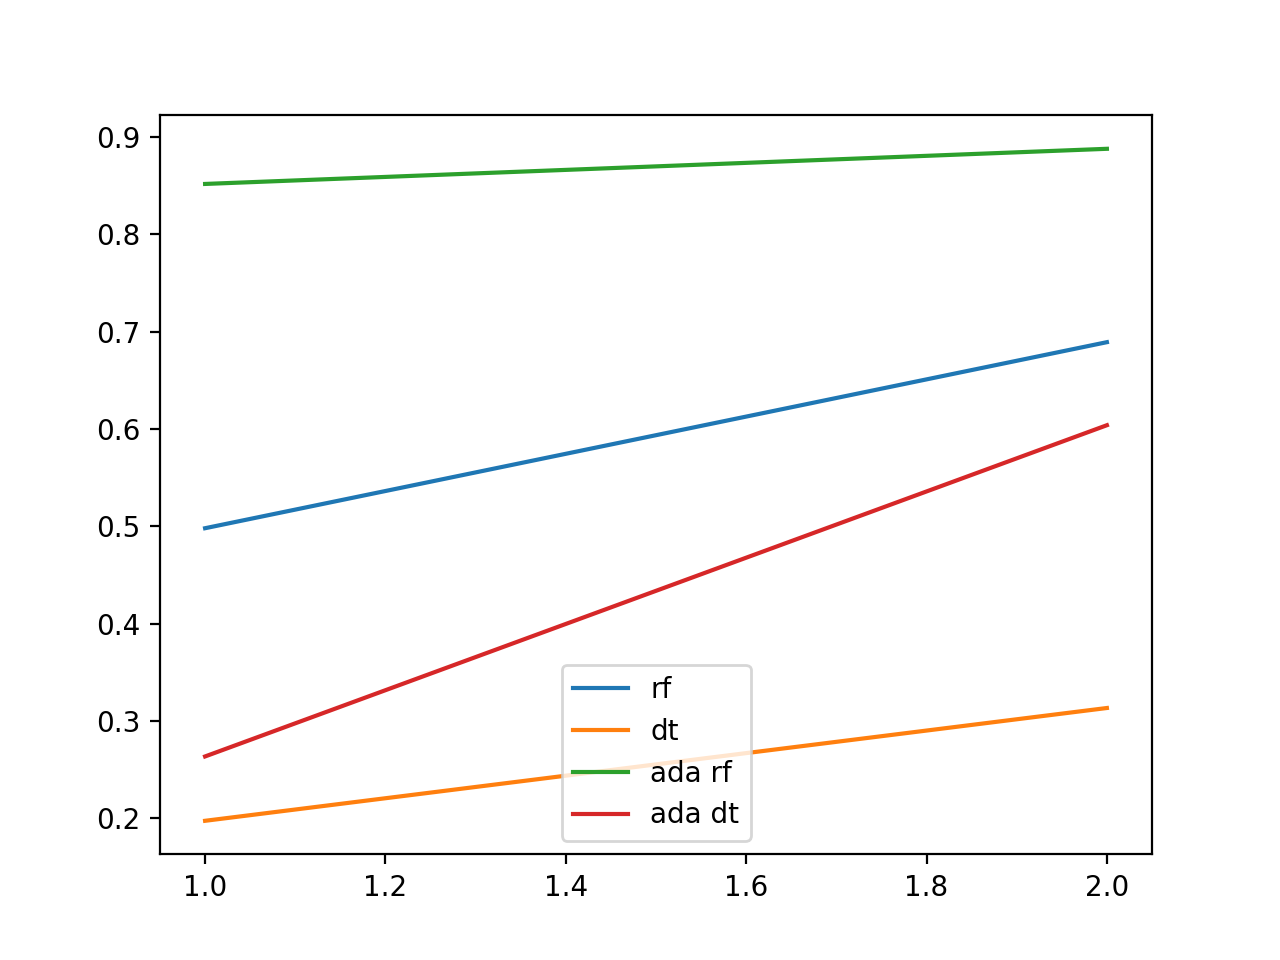

In [31]:
dept_list = [l for l in range (1,3)]
rf_list = []
dt_list = []
rf_ada_list = []
dt_ada_list = []
for dept in dept_list: 
    clf_rf = RandomForestClassifier(max_depth=dept)
    clf_dt = DecisionTreeClassifier(max_depth=dept)
    clf_ada_rf = AdaBoostClassifier(RandomForestClassifier(max_depth=dept))
    clf_ada_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=dept))
    score_rf = cross_val_score(clf_rf, X, y, cv=6)
    score_dt = cross_val_score(clf_dt, X, y, cv=6)
    score_ada_rf = cross_val_score(clf_ada_rf, X, y, cv=6)
    score_ada_dt = cross_val_score(clf_ada_dt, X, y, cv=6)
    rf_list.append(np.mean(score_rf))
    dt_list.append(np.mean(score_dt))
    rf_ada_list.append(np.mean(score_ada_rf))
    dt_ada_list.append(np.mean(score_ada_dt))

plt.figure()
plt.plot(dept_list,rf_list,label="rf")
plt.plot(dept_list,dt_list,label="dt")
plt.plot(dept_list,rf_ada_list,label="ada rf")
plt.plot(dept_list,dt_ada_list,label="ada dt")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


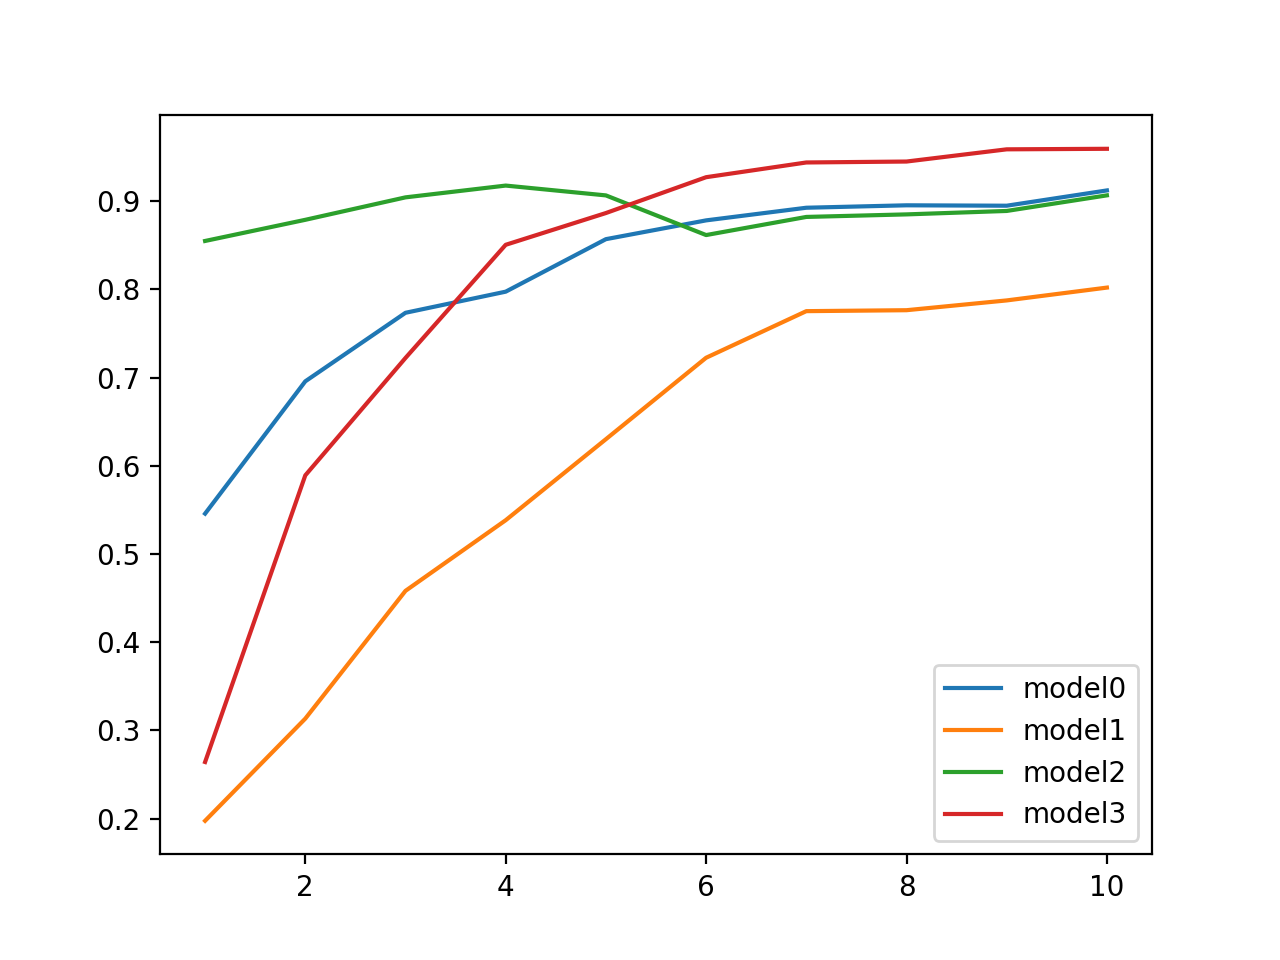

In [25]:

X = digits.data
y = digits.target

dept_list = [l for l in range (1,11)]
nb_model = 0
rf_list = []
dt_list = []
rf_ada_list = []
dt_ada_list = []
model_list = []
score_list_of_list = []
for dept in dept_list: 
    score_list = []
    model_list = [RandomForestClassifier(max_depth=dept), DecisionTreeClassifier(max_depth=dept)]
    model_list_ada = []
    # We adaboost the model
    for model in model_list:
        model_ada = AdaBoostClassifier(base_estimator = model)
        model_list_ada.append(model_ada)
    model_list = model_list + model_list_ada
    nb_model = len(model_list)
    
    for model in model_list:
        cross_score = cross_val_score(model, X, y, cv=6)
        score_list.append(np.mean(cross_score))
    score_list_of_list.append(score_list) #list of list : each list is perf for model 1 to 15 on this dept

    #.set_params( max_depth = dept)
    
np_list = np.array(score_list_of_list)
##
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
##

plt.figure()
for i in range(nb_model):
    plt.plot(dept_list,np_list[:,i],label="model"+str(i))
plt.legend()
plt.show()       


## Retriving variable name

In [26]:
import inspect

testooo = 12345

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

print (retrieve_name(testooo)[0])

testooo


# Hyperparameter optimisation

## Raw code

In [27]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

## Constructing a method

In [28]:

# OPTIM CLASSIFICATION
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


def optimise_my_model(classifier, tuned_parameters, X_train, X_test, y_train, y_test):
    
    scores = ['precision', 'recall', 'f1']

    for score in scores:
        print("################################################################")
        print("\nTuning hyper-parameters for \n ###### %s ###### \n" % score)
        print()

        clf = GridSearchCV(classifier, tuned_parameters, cv=5,
                           scoring='%s_macro' % score)
        clf.fit(X_train, y_train)
        
        print("#########")
        print("Best parameters set found on development set:\n")
        print(clf.best_params_)
        print("#########\n")
        print("Grid scores on development set:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        print("\nDetailed classification report:\n")
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.\n")
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
    
optimise_my_model(SVC(), tuned_parameters, X_train, X_test, y_train, y_test)

Automatically created module for IPython interactive environment
################################################################

Tuning hyper-parameters for 
 ###### precision ###### 


#########
Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
#########

Grid scores on development set:

0.973 (+/-0.030) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.938 (+/-0.027) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.023) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.022) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.020) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.022) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.020) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.035) for {'C': 1, 'kernel': 'linear'}
0.963 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
0.963 (+/-0.035) for {'C': 100, 'kernel': 'line